<h1>Module sklearn for preprocessing</h1>
<a href=https://github.com/CodexploreRepo/data-science/blob/main/Pages/P01_Data_Pre_Processing.md>Link to study repo</a>

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data_for_preprocessing.csv to data_for_preprocessing.csv


In [7]:
import io
df = pd.read_csv(io.StringIO(uploaded['data_for_preprocessing.csv'].decode('utf-8')))
df.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## Data Imputation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
for col in df.columns:
  missing_value = df[col].isna().sum()
  per_missing = missing_value/len(df)*100
  print(f"Column {col}: have {per_missing}% NaN")

Column Country: have 0.0% NaN
Column Age: have 10.0% NaN
Column Salary: have 10.0% NaN
Column Purchased: have 0.0% NaN


<Axes: >

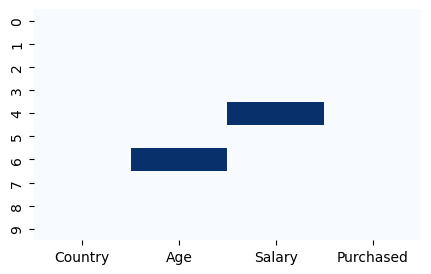

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(df.isna(), cmap="Blues", yticklabels=True, cbar=False)

In [ ]:
X = df.iloc[:, :-1].values   #use X as array in numpy
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [8]:
# y: target
y = df.iloc[:, -1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

## Use SimpleImputer to replace NaN
Thư viện sklearn.impute chứa thư viện SimpleImputer dễ dàng thay thế các giá trị NaN bằng mean, median,...

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encode Categorical Data
Thư viện sklearn.preprocessing chứa các class encode: OneHotEncoder, LabelEncoder,...
Encode Independent variable (X)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [0])], remainder="passthrough")
X = ct.fit_transform(X)
X #(Ger  Fran  Ger  Age   Salary)

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

Encode dependent variable (y)

In [ ]:
#LabelEncoder should be used to encode target values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Spliting the dataset (X=data, y=output) into the Training sets and Test sets
Sử dụng hàm train_test_split từ thư viện sklearn.model_selection để chia tập dữ liệu thành X_train, X_test, y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#random_state: giữ trạng thái random == random.seed(1)
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

##Feature Scaling
Column Age vs. Salary có sự chênh nhau lớn về giá trị, cần đưa về giống nhau để máy dễ học

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:]) #For X_test: apply StandardScaler only use transform,
# because we want to apply the SAME scale as X_train
X_train

array([[0.0, 0.0, 1.0, -0.1915918438457856, -1.0781259408412427],
       [0.0, 1.0, 0.0, -0.014117293757057902, -0.07013167641635401],
       [1.0, 0.0, 0.0, 0.5667085065333239, 0.6335624327104546],
       [0.0, 0.0, 1.0, -0.3045301939022488, -0.30786617274297895],
       [0.0, 0.0, 1.0, -1.901801144700799, -1.4204636155515822],
       [1.0, 0.0, 0.0, 1.1475343068237056, 1.2326533634535488],
       [0.0, 1.0, 0.0, 1.4379472069688966, 1.5749910381638883],
       [1.0, 0.0, 0.0, -0.7401495441200352, -0.5646194287757336]],
      dtype=object)